In [1]:
import numpy as np
#from numpy import linalg 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import linalg

In [2]:
#integral
def I(a, b, xm, N):
    H = (b - a) / N
    X = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    sum = 0
    for i in range(N):
        X[i] = (H / 2) + i * H + a      
        F[i] = np.log(1 / np.abs(xm - X[i])) 
        sum += F[i]
    return sum * H

#special integral I
def Int(u, v, i, N):
    h = u/N
    halfH = h/2
    z = np.zeros((N, 1))
    F = np.zeros((N, 1))
    for j in range(N):
        z[j] = halfH + j * h
           
    #middle
    def Func(x): 
        return (np.log(x) * np.power(x, i - 1)) / (np.sqrt(1 - (x + v)*(x + v)))
    for j in range(N):
        res = Func(z[j])
        F[j] = res
    
    sum = 0
    for j in range(N):
        sum += F[j]
    
    interior = h * sum
    return interior 

#beta
def beta(xm, h, N):
    if xm >= 0 and xm <= h:
        return - Int(xm, -xm, 1, N) + (1 / h) * Int(xm, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= h and xm <= 1 - h:
        return - Int(h, -xm, 1, N) + (1 / h) * Int(h, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= 1 - h and xm <= 1:
        return - Int(h, -xm, 1, N) + (1/h) * Int(h, -xm, 2, N) - Int(1-xm, xm, 1, N) + (1 / h) * Int(1-xm, xm, 2, N)
    else:
        print("error")
        return 0

In [3]:
def Processing(N):
    h = 1 / N

    XM = np.zeros((N, 1))
    for i in range(N):
        XM[i] = 0 + (h / 2) + i * h

    SN = np.zeros((N + 1, 1))
    for j in range(N + 1):
        SN[j] = 0 + j * h
    
    mat = np.zeros((N, N), dtype = np.complex)
    for m in range(N):
        for n in range(N):
            if n == m:
                mat[m, n] = beta(XM[m], h, N) * np.sqrt(1 - XM[m] * XM[m]) + 0 #LEGIT
            else:
                mat[m, n] = I(SN[n], SN[n + 1], XM[m], N) 

    right = np.full((N, 1), 1, dtype = np.complex)
    
    #answer = linalg.solve(mat, right)
    
    answer, inf = sp.sparse.linalg.bicgstab(mat, right)
    print(inf)

    res_real = np.real(answer)
    
    ############part with error
    
    S = np.zeros((N, 1))
    def sln(x):
        return 1 / (2 * np.pi * np.log(2) * np.sqrt(x * (1 - x)))
    for i in range(N):
        S[i] = sln(XM[i])
        
    error = np.zeros((N, 1))
    for i in range(N):
        error[i] = np.abs(res_real[i] - S[i])
       
    print(XM[N//2])
    print(XM[3 * N//10])
    print(XM[N//10])
    
    print("Error in center = ", error[N//2])
    print("Error in 0.3 = ", error[3 * N//10])
    print("Error in 0.1 = ", error[N//10])
    
    return XM, SN, res_real, S, error, N

In [4]:
res0 = Processing(30)

0
[0.51666667]
[0.31666667]
[0.11666667]
Error in center =  [0.00094361]
Error in 0.3 =  [0.00204112]
Error in 0.1 =  [0.02343575]


In [5]:
res1 = Processing(50)

0
[0.51]
[0.31]
[0.11]
Error in center =  [0.0004601]
Error in 0.3 =  [0.00154162]
Error in 0.1 =  [0.01441193]


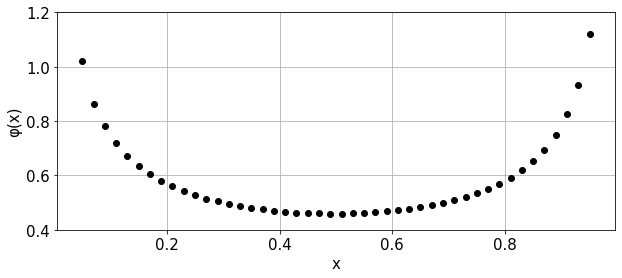

In [6]:
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'xtick.labelsize': 15})
plt.rcParams.update({'ytick.labelsize': 15})

plt.rcParams['figure.figsize'] = [10, 4] #took in

#plt.plot(res1[0][2: res1[5] - 2], res1[3][2: res1[5] - 2], color = 'red')
plt.plot(res1[0][2: res1[5] - 2], res1[2][2: res1[5] - 2], 'bo', color = '0')

#plt.xlim(0.0, 0.5)
plt.ylim(0.4, 1.2)

plt.xlabel("x")
plt.ylabel("φ(x)")

plt.grid()
plt.show()

In [7]:
res2 = Processing(100)

0
[0.505]
[0.305]
[0.105]
Error in center =  [0.00013262]
Error in 0.3 =  [0.00110534]
Error in 0.1 =  [0.00899746]


In [8]:
res3 = Processing(200)

0
[0.5025]
[0.3025]
[0.1025]
Error in center =  [4.39021036e-05]
Error in 0.3 =  [0.00064864]
Error in 0.1 =  [0.0056078]


In [9]:
def residual(sn, results, N):
    
    x1 = 0.5 + 0.5 * (1/N)
    x2 = 0.3 + 0.5 * (1/N)
    x3 = 0.1 + 0.5 * (1/N)
    print(x1)
    print(x2)
    print(x3)
    
    numSln1 = 0
    extra = np.zeros((N, 1))
    for i in range(N):
        numSln1 += results[i] * np.log(1 / np.abs(sn[i] - x1))
    numSln1 *= (1/N)
    #print(numSln1)
    
    print("Residual in 0.5 = ", np.abs(numSln1 - 1))
    
    numSln2 = 0
    extra = np.zeros((N, 1))
    for i in range(N):
        numSln2 += results[i] * np.log(1 / np.abs(sn[i] - x2))
    numSln2 *= (1/N)
    #print(numSln2)
    
    print("Residual in 0.3 = ", np.abs(numSln2 - 1))
    
    numSln3 = 0
    extra = np.zeros((N, 1))
    for i in range(N):
        numSln3 += results[i] * np.log(1 / np.abs(sn[i] - x3))
    numSln3 *= (1/N)
    #print(numSln3)
    
    print("Residual in 0.1 = ", np.abs(numSln3 - 1))

In [10]:
residual(res0[1], res0[2], res0[5])

0.5166666666666667
0.31666666666666665
0.11666666666666667
Residual in 0.5 =  [0.007335]
Residual in 0.3 =  [0.00771741]
Residual in 0.1 =  [0.01044499]


In [11]:
residual(res1[1], res1[2], res1[5])

0.51
0.31
0.11
Residual in 0.5 =  [0.00447259]
Residual in 0.3 =  [0.00476713]
Residual in 0.1 =  [0.00673392]


In [12]:
residual(res2[1], res2[2], res2[5])

0.505
0.305
0.10500000000000001
Residual in 0.5 =  [0.00226544]
Residual in 0.3 =  [0.00244251]
Residual in 0.1 =  [0.00357545]


In [13]:
residual(res3[1], res3[2], res3[5])

0.5025
0.3025
0.10250000000000001
Residual in 0.5 =  [0.00114399]
Residual in 0.3 =  [0.00122961]
Residual in 0.1 =  [0.00184784]
